In [37]:
from numpy import asarray
import numpy as np
from ast import literal_eval
from math import sqrt

In [38]:
def distanceSquared(point, other):
    return (point[0]-other[0])**2 + (point[1]-other[1])**2

def isInCicrle(circles, point):
    for circle in circles:
        if distanceSquared(point, circle[0])< circle[1]**2:
            return True
    return False

def toDistanceInPixels(number):
    return number/(width * height)

def toSpaceCoord(coord):
    return (coord[0] * width, coord[1] * height)

def cirles(coord_and_dist, coordinates_file, distances_file, width, height, max_spheres):  
    coordinates_circles = [] #[(Point,r)]
    for i in range(len(coord_and_dist)):
        distance = coord_and_dist[i][1]
        if (distance > 0 and len(coordinates_circles) < max_spheres):
            coordinates = coord_and_dist[i][0]
            coord = (coordinates[0], coordinates[1])
            if(not isInCicrle(coordinates_circles, coord)):
                coordinates_circles.append((coord, distance))

    return coordinates_circles

In [39]:
def toSpaceCoord3D(coord):
    return (coord[0] * width, coord[1] * height, coord[2] * depth)

def distanceSquared3D(point, other):
    return (point[0]-other[0])**2 + (point[1]-other[1])**2 + (point[2]-other[2])**2

def isInSphere(spheres, point):
    for sphere in spheres:
        if distanceSquared3D(point, sphere[0])< sphere[1]**2:
            return True
    return False

def spheres(coord_and_dist, coordinates_file, distances_file, width, height, max_spheres):  
    coordinates_spheres = [] #[(Point,r)]
    for i in range(len(coord_and_dist)):
        distance = coord_and_dist[i][1]
        if (distance > 0 and len(coordinates_spheres) < max_spheres):
            coordinates = coord_and_dist[i][0]
            coord = (coordinates[0], coordinates[1], coordinates[2])
            if(not isInSphere(coordinates_spheres, coord)):
                coordinates_spheres.append((coord, distance))

    return coordinates_spheres

In [40]:
from mayavi import mlab
import numpy as np

def plotSpheres2(spheres,use_brightness_level, do_loop):
    x = []
    y = []
    z = []
    r = []
    for sphere in spheres:
        coord = sphere[0]
        x.append(coord[0])
        y.append(coord[1])
        z.append(coord[2])
        r.append(sphere[1])
    mlab.points3d(x,y,z,r)

    mlab.show()



In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def plotSpheres(spheres,use_brightness_level, do_loop):
    # img = mpimg.imread('./densityMap.png')

    # Create a figure. Equal aspect so circles look circular
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.set_aspect("auto")

    # Show the image
    #ax.imshow(img)

    # Now, loop through coord arrays, and create a circle at each x,y pair
    amountOfSpheres = len(spheres)
    brightness = amountOfSpheres
    baseColor = 0.4
    r = 1
    g = 0
    b = 0
    time_between_sphere_draw = 0.1
    x = []
    y = []
    z = []
    r = []
    for sphere in spheres:
        coord = sphere[0]
        x.append(coord[0])
        y.append(coord[1])
        z.append(coord[2])
        r.append(sphere[1])

    #ax.plot_wireframe(np.array(x),np.array(y),np.array(z), rstride=2, cstride=2)
    ax.plot_trisurf(x, y, z, linewidth=0, antialiased=False)
    #ax.plot_surface(x, y, np.array(z), color=[1,0,0])
    # for sphere in spheres:
    #    if (use_brightness_level):
    #        b = brightness/amountOfSpheres
    #        color = [max(baseColor, r * b), max(baseColor, g *b),max(baseColor, b *b)]
    #    else:
    #        color = [r,g,b]
    #    sph = sphere[0]
    #    ax.plot_surface(sph[0], sph[1], sph[2], color=[color[0], color[1], color[2], brightness/len(spheres)], linewidth=0, alpha=0.5)
    #    # rstride=4, cstride=4, 
    #    brightness -= 1
    #    if (do_loop):
    #        plt.pause(time_between_sphere_draw)
            
    
    
    # plt.rcParams['figure.figsize'] = [9,9]
    # plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    
    # Show the image
    plt.show()

ValueError: x and y arrays must consist of at least 3 unique points

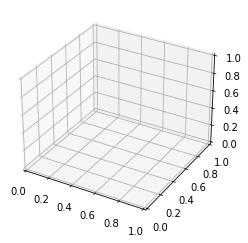

In [47]:
spheres = [((1,1,1),2), ((1,5,1),3), ((1,1,3),2)]
use_brightness_level = False
do_loop = False
plotSpheres(spheres,use_brightness_level, do_loop)

In [52]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def plot(circles,use_brightness_level, do_loop):
    img = mpimg.imread('./densityMap.png')

    # Create a figure. Equal aspect so circles look circular
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')

    # Show the image
    ax.imshow(img)

    # Now, loop through coord arrays, and create a circle at each x,y pair
    amountOfCircles = len(circles)
    brightness = amountOfCircles
    baseColor = 0.4
    r = 1
    g = 0
    b = 0
    time_between_circle_draw = 0.1
    for circle in circles:
        if (use_brightness_level):
            b = brightness/amountOfCircles
            color = [max(baseColor, r * b), max(baseColor, g *b),max(baseColor, b *b)]
        else:
            color = [r,g,b]
        circ = Circle(circle[0], circle[1], color=[color[0], color[1], color[2], brightness/len(circles)])
        ax.add_patch(circ)
        brightness -= 1
        if (do_loop):
            plt.pause(time_between_circle_draw)
    
    plt.rcParams['figure.figsize'] = [9,9]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    
    # Show the image
    plt.show()

In [49]:
width = 702
height = 711
coordinates_file = "./files/coordinates.txt"
distances_file = "./files/distances.txt"
with open(coordinates_file) as f:
    coordinates = [literal_eval(line) for line in f]
coordinates = list(map(toSpaceCoord, asarray(coordinates[0])))

with open(distances_file) as f:
    distances = [literal_eval(line) for line in f]
distances = list(distances[0])
distances = [-distance for distance in distances]
coord_and_dist = [(coordinates[i], distances[i]) for i in range(len(distances))]
coord_and_dist.sort(reverse = True, key = lambda x: x[1])  
    
def generateSpheres(max_spheres, do_loop,use_brightness_level):
    circles = cirles(coord_and_dist, coordinates_file, distances_file, width, height, max_spheres)
    plot(circles, use_brightness_level, do_loop)
    return circles

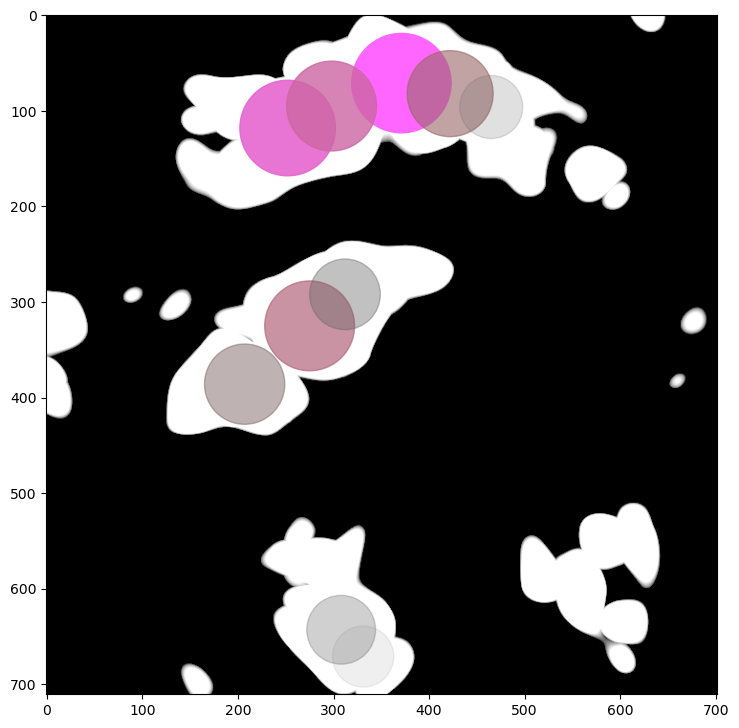

In [53]:
circles = generateSpheres(10, do_loop=False, use_brightness_level=True)

In [54]:
def generateShader(circles):
    f = "float sphereSD(vec2 p, vec2 pos, float r) { return length(pos - p) - r; }\nfloat sceneSDF(vec2 inputPoint) {\nreturn "
    circle = circles[0]
    prev = "sphereSD(inputPoint, vec2({0}, {1}), {2})".format(circle[0][0], circle[0][1], float(circle[1]))
    for i in range(1,len(circles)):
        circle = circles[i]
        opt = "min(sphereSD(inputPoint, vec2({0}, {1}), {2}), {3})".format(circle[0][0], circle[0][1], float(circle[1]), prev)
        prev = opt
    f += opt
    f += ";\n}"
    return f

def generateShaderDynamic(circles):
    f = "float sphereSD(vec2 p, vec2 pos, float r) { return length(pos - p) - r; }\nfloat sceneSDF(vec2 inputPoint) {\n"
    
    f += "float unionBody = 0.0;\nfor(float t=0.0; t<{0};t++)\n{\n\t unionBody = min(sphereSD(inputPoint, vec2({0}, {1}), {2}), unionBody);\n}\n\t return unionBody;}"
    circle = circles[0]
    prev = "sphereSD(inputPoint, vec2({0}, {1}), {2})".format(circle[0][0], circle[0][1], float(circle[1]))
    for i in range(1,len(circles)):
        circle = circles[i]
        opt = "min(sphereSD(inputPoint, vec2({0}, {1}), {2}), {3})".format(circle[0][0], circle[0][1], float(circle[1]), prev)
        prev = opt
    f += opt
    f += ";\n}"
    return f

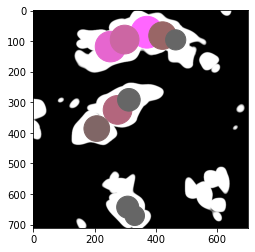

In [25]:
%matplotlib inline
generateSpheres(10, do_loop=False, use_brightness_level=True)

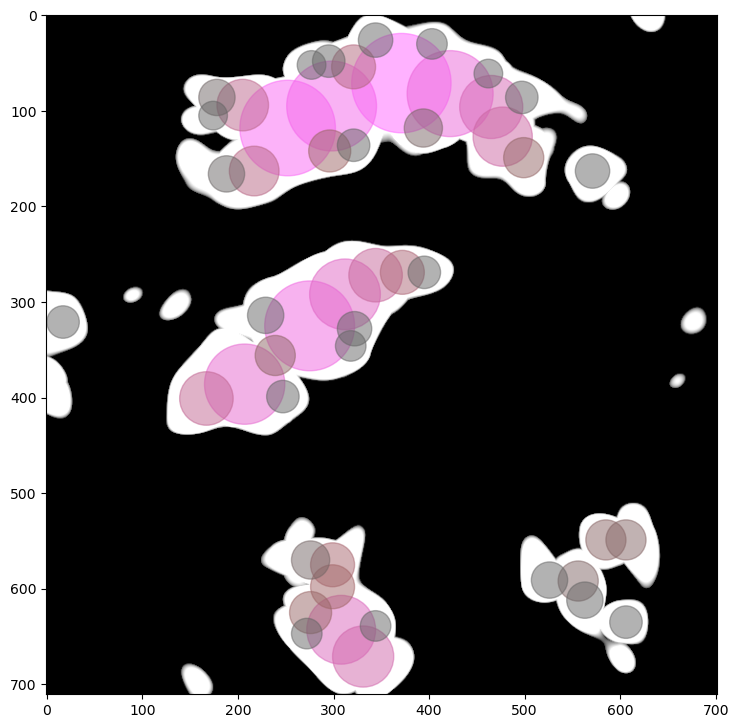

float sphereSD(vec2 p, vec2 pos, float r) { return length(pos - p) - r; }
float sceneSDF(vec2 inputPoint) {
return min(sphereSD(inputPoint, vec2(174.0, 105.0), 15.0), min(sphereSD(inputPoint, vec2(462.0, 61.0), 15.0), min(sphereSD(inputPoint, vec2(277.0, 52.0), 15.0), min(sphereSD(inputPoint, vec2(272.0, 647.0), 16.0), min(sphereSD(inputPoint, vec2(344.0, 639.0), 16.0), min(sphereSD(inputPoint, vec2(318.0, 346.0), 16.0), min(sphereSD(inputPoint, vec2(403.0, 30.0), 16.0), min(sphereSD(inputPoint, vec2(606.0, 635.0), 17.0), min(sphereSD(inputPoint, vec2(247.0, 399.0), 17.0), min(sphereSD(inputPoint, vec2(17.0, 321.0), 17.0), min(sphereSD(inputPoint, vec2(395.0, 269.0), 17.0), min(sphereSD(inputPoint, vec2(321.0, 136.0), 17.0), min(sphereSD(inputPoint, vec2(497.0, 86.0), 17.0), min(sphereSD(inputPoint, vec2(295.0, 47.99999999999999), 17.0), min(sphereSD(inputPoint, vec2(322.0, 328.0), 18.0), min(sphereSD(inputPoint, vec2(571.0, 163.0), 18.0), min(sphereSD(inputPoint, vec2(344.0, 26.0), 18

In [42]:
generateShader(generateSpheres(50, do_loop=False, use_brightness_level=True))

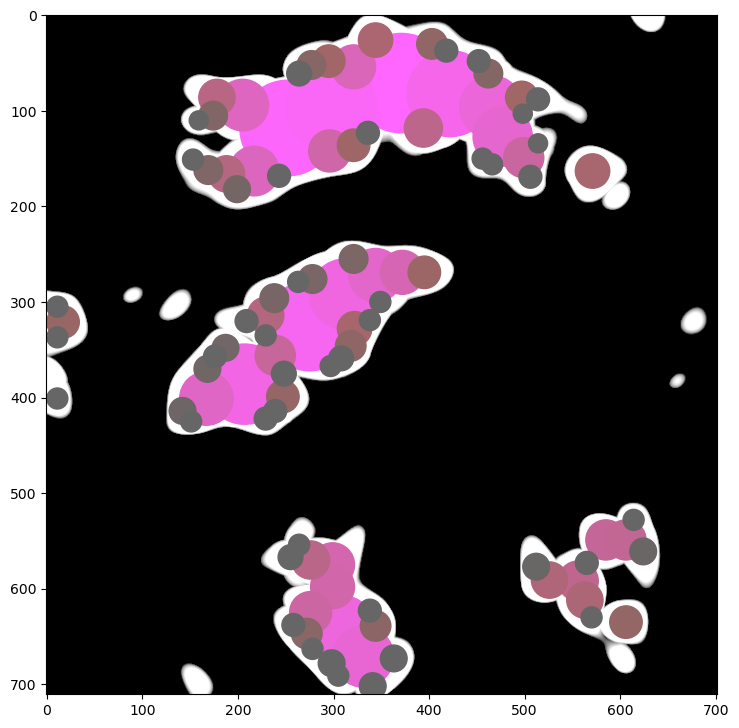

[((371.0, 71.0), 52),
 ((252.0, 118.0), 50),
 ((298.0, 94.99999999999999), 47),
 ((275.0, 325.0), 47),
 ((422.00000000000006, 82.0), 45),
 ((207.0, 385.99999999999994), 42),
 ((312.0, 292.0), 37),
 ((308.0, 643.0), 36),
 ((465.0, 95.99999999999999), 33),
 ((331.0, 671.0), 32),
 ((477.0, 127.0), 31),
 ((344.0, 272.0), 28),
 ((167.0, 401.0), 28),
 ((205.0, 94.00000000000001), 27),
 ((217.0, 163.0), 26),
 ((321.0, 54.0), 23),
 ((372.0, 269.0), 23),
 ((299.0, 575.0), 23),
 ((299.0, 598.0), 23),
 ((296.0, 142.0), 22),
 ((276.0, 625.0), 22),
 ((498.99999999999994, 149.0), 21),
 ((238.99999999999997, 356.0), 21),
 ((585.0, 549.0), 21),
 ((606.0, 549.0), 21),
 ((556.0, 592.0), 21),
 ((394.00000000000006, 118.0), 20),
 ((276.0, 570.0), 20),
 ((178.00000000000003, 86.0), 19),
 ((188.0, 166.0), 19),
 ((229.0, 314.0), 19),
 ((526.0, 591.0), 19),
 ((563.0, 612.0), 19),
 ((344.0, 26.0), 18),
 ((571.0, 163.0), 18),
 ((322.0, 328.0), 18),
 ((295.0, 47.99999999999999), 17),
 ((497.0, 86.0), 17),
 ((321

In [33]:
generateSpheres(100, do_loop=False, use_brightness_level=True)

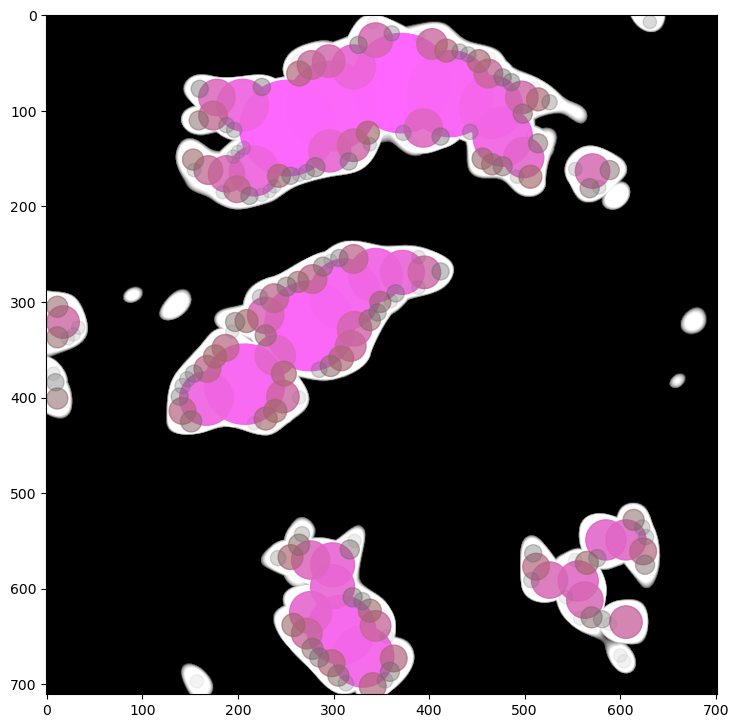

[((371.0, 71.0), 52),
 ((252.0, 118.0), 50),
 ((298.0, 94.99999999999999), 47),
 ((275.0, 325.0), 47),
 ((422.00000000000006, 82.0), 45),
 ((207.0, 385.99999999999994), 42),
 ((312.0, 292.0), 37),
 ((308.0, 643.0), 36),
 ((465.0, 95.99999999999999), 33),
 ((331.0, 671.0), 32),
 ((477.0, 127.0), 31),
 ((344.0, 272.0), 28),
 ((167.0, 401.0), 28),
 ((205.0, 94.00000000000001), 27),
 ((217.0, 163.0), 26),
 ((321.0, 54.0), 23),
 ((372.0, 269.0), 23),
 ((299.0, 575.0), 23),
 ((299.0, 598.0), 23),
 ((296.0, 142.0), 22),
 ((276.0, 625.0), 22),
 ((498.99999999999994, 149.0), 21),
 ((238.99999999999997, 356.0), 21),
 ((585.0, 549.0), 21),
 ((606.0, 549.0), 21),
 ((556.0, 592.0), 21),
 ((394.00000000000006, 118.0), 20),
 ((276.0, 570.0), 20),
 ((178.00000000000003, 86.0), 19),
 ((188.0, 166.0), 19),
 ((229.0, 314.0), 19),
 ((526.0, 591.0), 19),
 ((563.0, 612.0), 19),
 ((344.0, 26.0), 18),
 ((571.0, 163.0), 18),
 ((322.0, 328.0), 18),
 ((295.0, 47.99999999999999), 17),
 ((497.0, 86.0), 17),
 ((321

In [47]:
generateSpheres(200, do_loop=False, use_brightness_level=True)

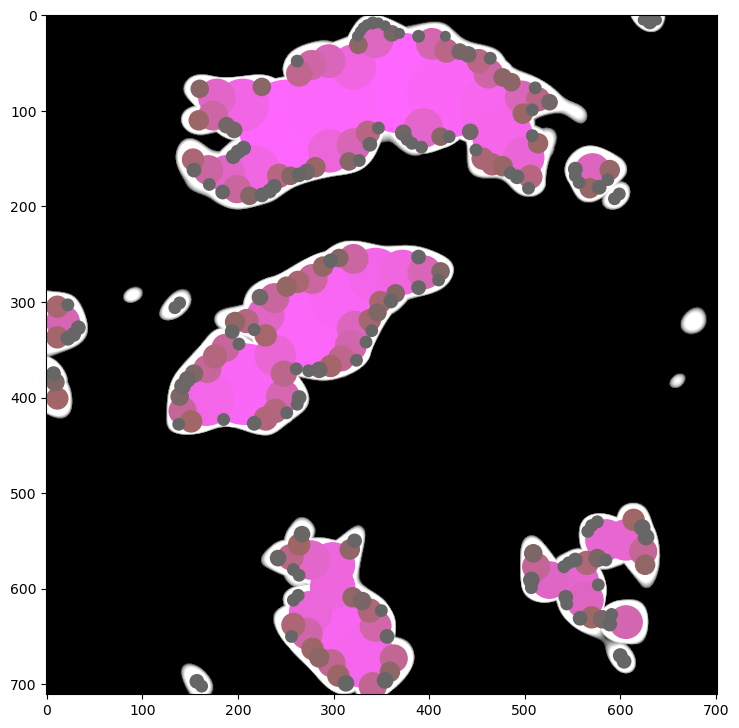

float sphereSD(vec2 p, vec2 pos, float r) { return length(pos - p) - r; }
float sceneSDF(vec2 inputPoint) {
return min(sphereSD(inputPoint, vec2(417.0, 22.0), 5.0), min(sphereSD(inputPoint, vec2(325.0, 22.0), 5.0), min(sphereSD(inputPoint, vec2(369.0, 19.0), 5.0), min(sphereSD(inputPoint, vec2(328.0, 17.0), 5.0), min(sphereSD(inputPoint, vec2(331.0, 13.0), 5.0), min(sphereSD(inputPoint, vec2(354.0, 11.0), 5.0), min(sphereSD(inputPoint, vec2(335.0, 10.0), 5.0), min(sphereSD(inputPoint, vec2(347.0, 8.0), 5.0), min(sphereSD(inputPoint, vec2(638.0, 5.0), 5.0), min(sphereSD(inputPoint, vec2(624.0, 5.0), 5.0), min(sphereSD(inputPoint, vec2(162.0, 702.0), 6.0), min(sphereSD(inputPoint, vec2(256.0, 650.0), 6.0), min(sphereSD(inputPoint, vec2(591.0, 627.0), 6.0), min(sphereSD(inputPoint, vec2(350.0, 623.0), 6.0), min(sphereSD(inputPoint, vec2(544.0, 616.0), 6.0), min(sphereSD(inputPoint, vec2(258.0, 612.0), 6.0), min(sphereSD(inputPoint, vec2(263.0, 607.0), 6.0), min(sphereSD(inputPoint, vec2(5

In [39]:
print(generateShader(generateSpheres(250, do_loop=False, use_brightness_level=True)))

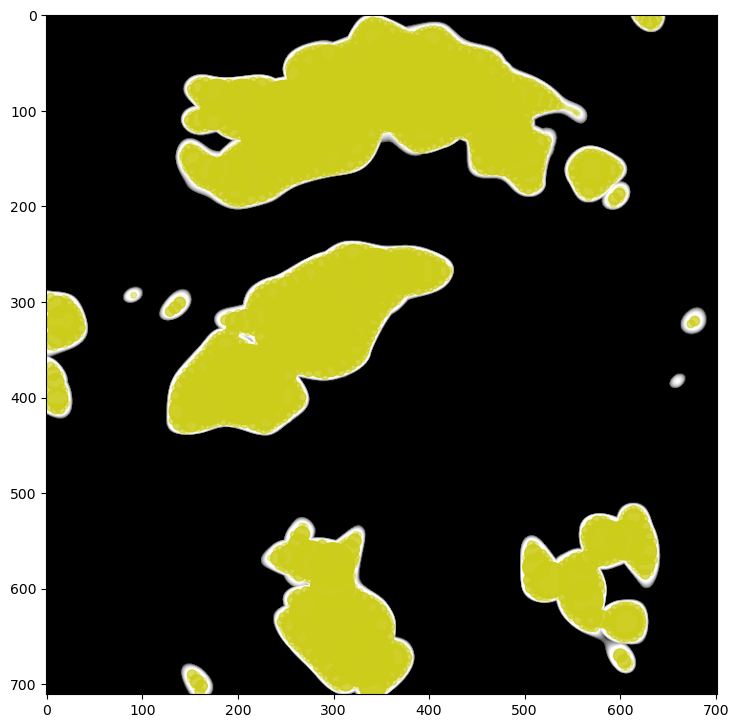

[((371.0, 71.0), 52),
 ((252.0, 118.0), 50),
 ((298.0, 94.99999999999999), 47),
 ((275.0, 325.0), 47),
 ((422.00000000000006, 82.0), 45),
 ((207.0, 385.99999999999994), 42),
 ((312.0, 292.0), 37),
 ((308.0, 643.0), 36),
 ((465.0, 95.99999999999999), 33),
 ((331.0, 671.0), 32),
 ((477.0, 127.0), 31),
 ((344.0, 272.0), 28),
 ((167.0, 401.0), 28),
 ((205.0, 94.00000000000001), 27),
 ((217.0, 163.0), 26),
 ((321.0, 54.0), 23),
 ((372.0, 269.0), 23),
 ((299.0, 575.0), 23),
 ((299.0, 598.0), 23),
 ((296.0, 142.0), 22),
 ((276.0, 625.0), 22),
 ((498.99999999999994, 149.0), 21),
 ((238.99999999999997, 356.0), 21),
 ((585.0, 549.0), 21),
 ((606.0, 549.0), 21),
 ((556.0, 592.0), 21),
 ((394.00000000000006, 118.0), 20),
 ((276.0, 570.0), 20),
 ((178.00000000000003, 86.0), 19),
 ((188.0, 166.0), 19),
 ((229.0, 314.0), 19),
 ((526.0, 591.0), 19),
 ((563.0, 612.0), 19),
 ((344.0, 26.0), 18),
 ((571.0, 163.0), 18),
 ((322.0, 328.0), 18),
 ((295.0, 47.99999999999999), 17),
 ((497.0, 86.0), 17),
 ((321

In [51]:
generateSpheres(1000, do_loop=False, use_brightness_level=True)

In [6]:
%matplotlib
generateSpheres(2000, do_loop=True, use_brightness_level=True)

Using matplotlib backend: TkAgg


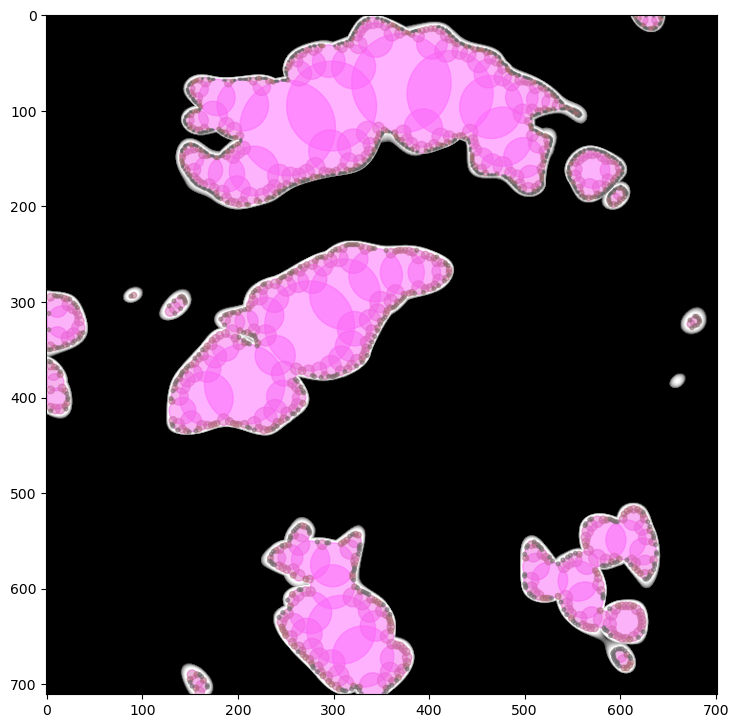

[((371.0, 71.0), 52),
 ((252.0, 118.0), 50),
 ((298.0, 94.99999999999999), 47),
 ((275.0, 325.0), 47),
 ((422.00000000000006, 82.0), 45),
 ((207.0, 385.99999999999994), 42),
 ((312.0, 292.0), 37),
 ((308.0, 643.0), 36),
 ((465.0, 95.99999999999999), 33),
 ((331.0, 671.0), 32),
 ((477.0, 127.0), 31),
 ((344.0, 272.0), 28),
 ((167.0, 401.0), 28),
 ((205.0, 94.00000000000001), 27),
 ((217.0, 163.0), 26),
 ((321.0, 54.0), 23),
 ((372.0, 269.0), 23),
 ((299.0, 575.0), 23),
 ((299.0, 598.0), 23),
 ((296.0, 142.0), 22),
 ((276.0, 625.0), 22),
 ((498.99999999999994, 149.0), 21),
 ((238.99999999999997, 356.0), 21),
 ((585.0, 549.0), 21),
 ((606.0, 549.0), 21),
 ((556.0, 592.0), 21),
 ((394.00000000000006, 118.0), 20),
 ((276.0, 570.0), 20),
 ((178.00000000000003, 86.0), 19),
 ((188.0, 166.0), 19),
 ((229.0, 314.0), 19),
 ((526.0, 591.0), 19),
 ((563.0, 612.0), 19),
 ((344.0, 26.0), 18),
 ((571.0, 163.0), 18),
 ((322.0, 328.0), 18),
 ((295.0, 47.99999999999999), 17),
 ((497.0, 86.0), 17),
 ((321

In [43]:
generateSpheres(2000, do_loop=False, use_brightness_level=True)